In [22]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df= pd.read_csv('/Users/sachinsajith/Documents/Porfolio/Correlation Python/movies.csv')

In [23]:
#Looking at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [24]:
# Chekcing for missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull()) 
    print(f"{col}-{percent_missing:.2f} %")

name-0.00 %
rating-0.01 %
genre-0.00 %
year-0.00 %
released-0.00 %
score-0.00 %
votes-0.00 %
director-0.00 %
writer-0.00 %
star-0.00 %
country-0.00 %
budget-0.28 %
gross-0.02 %
company-0.00 %
runtime-0.00 %


In [25]:
# Checking data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<Axes: >

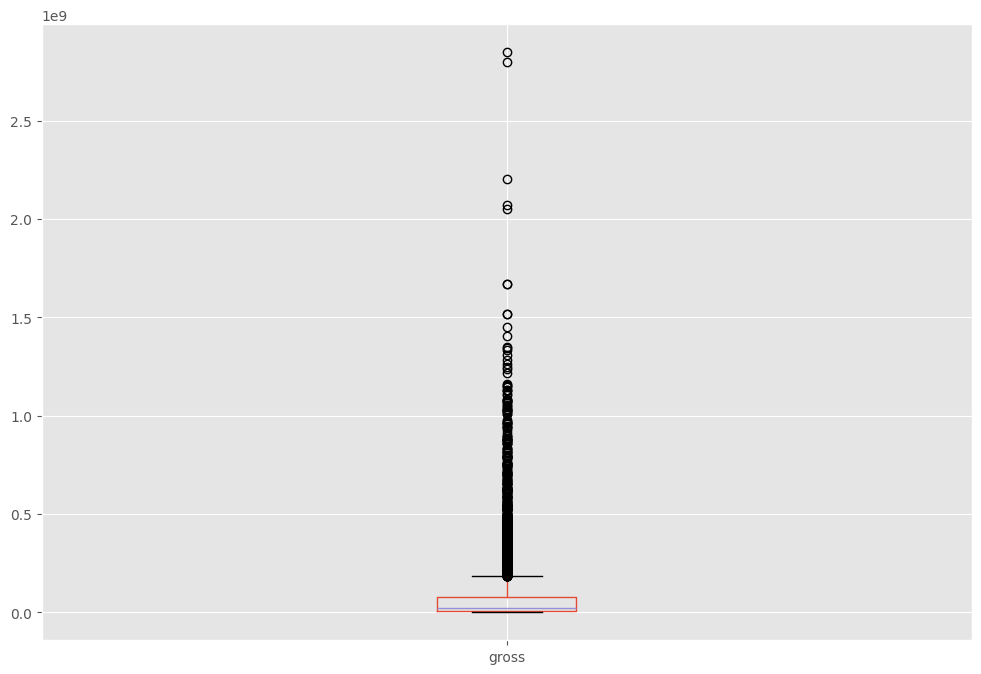

In [26]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [27]:
# Drop rows with NaN values
df.dropna(subset=['budget', 'gross', 'votes'], inplace=True)

# Convert columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [28]:
#Create correct year column
df['corrected_year'] = df['released'].astype(str).str[-20:-15]

In [29]:
df = df.sort_values(by = 'gross', inplace = False, ascending = False)
pd.set_option('display.max_rows',None)

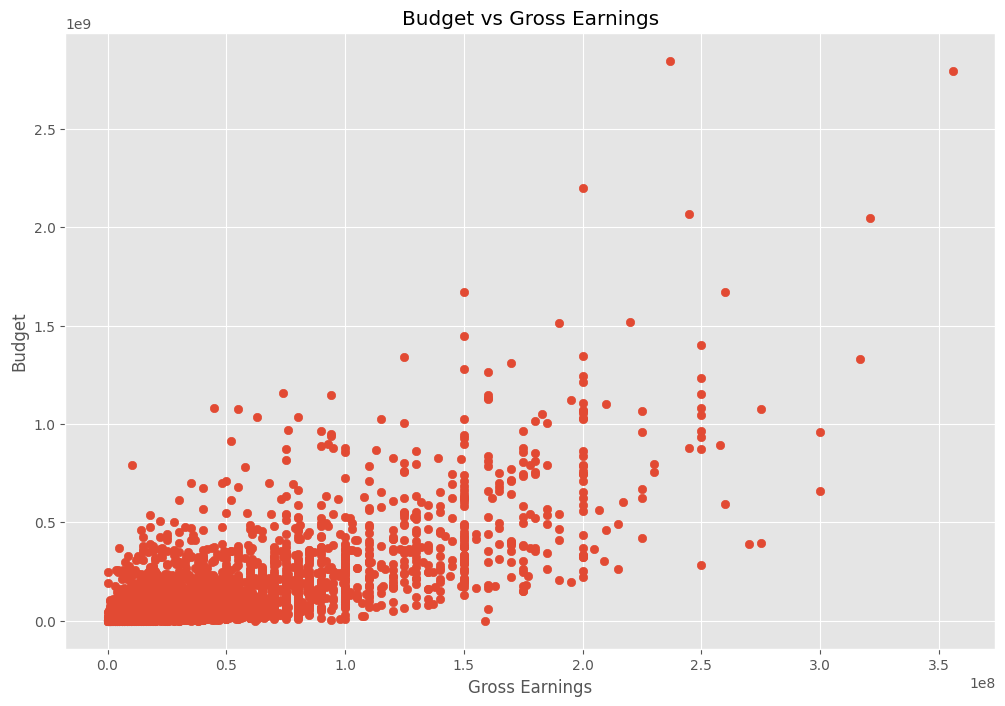

In [30]:
# Scatter Plot for Budget vs Gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

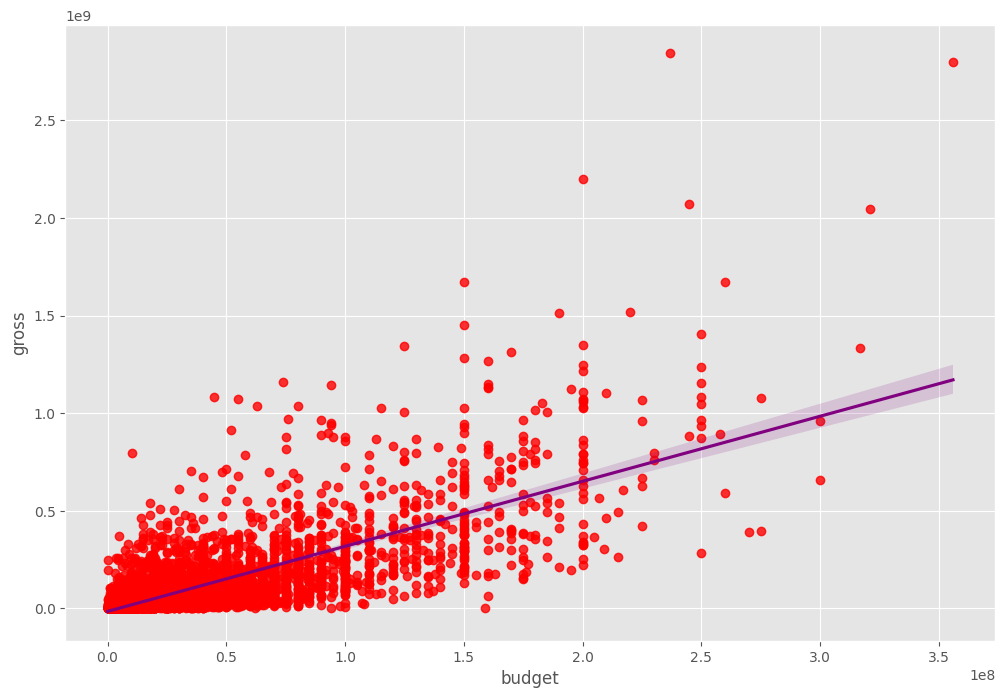

In [31]:
# Scatter Plot for Budget vs GrossScatter with a Regression Line
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'},line_kws={'color':'purple'})

In [32]:
# Looking at correlation
df.corr(method = 'pearson',numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

In [33]:
# High correlation between Budget and Gross


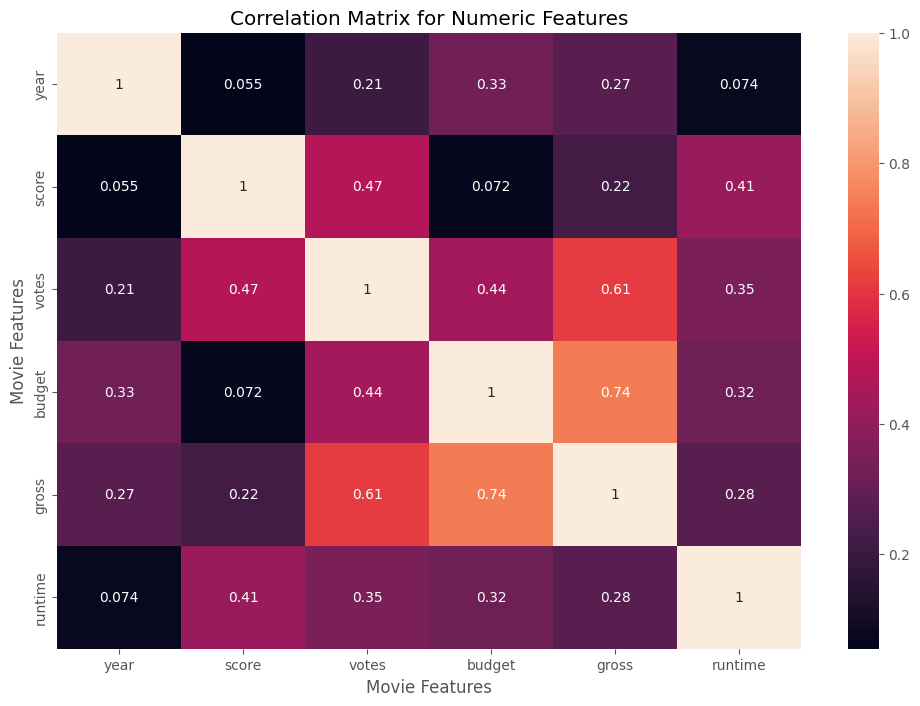

In [34]:
# Constructing a correlation matrix
correlation_matrix = df.corr(method = 'pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [35]:
# Looking at companies
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime corrected_year  
5445  2847246203  Twentieth Century Fox    162.0          2009   
7445  2797501328         Marvel Studios    181.0          2019   
3045  2201647264  Twentieth Century Fox    194.0          1997   
6663  2069521700              Lucasfilm    138.0          2015   
7244  2048359754         Marvel Studios    149.0          2018

In [36]:
df.head

<bound method NDFrame.head of                                                    name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action  

In [37]:
# Convert categorical variables to numeric codes
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head 

<bound method NDFrame.head of       name  rating  genre  year  released  score    votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000       787    1265   
7445   389       5      0  2019       138    8.4   903000       106     515   
3045  4923       5      6  1997       535    7.8  1100000       787    1265   
6663  3656       5      0  2015       530    7.8   876000       770    1810   
7244   390       5      0  2018       146    8.4   897000       106     515   
7480  4402       4      2  2019      1130    6.9   222000      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000      1062    1650   
6646  1545       5      0  2015       166    7.1   370000       811     483   
7494  1534       4      2  2019      2059    6.8   148000       279    1386   
6644   388       5      0  2015      1717    7.3   777000      1062    1650   
7247   568       5    

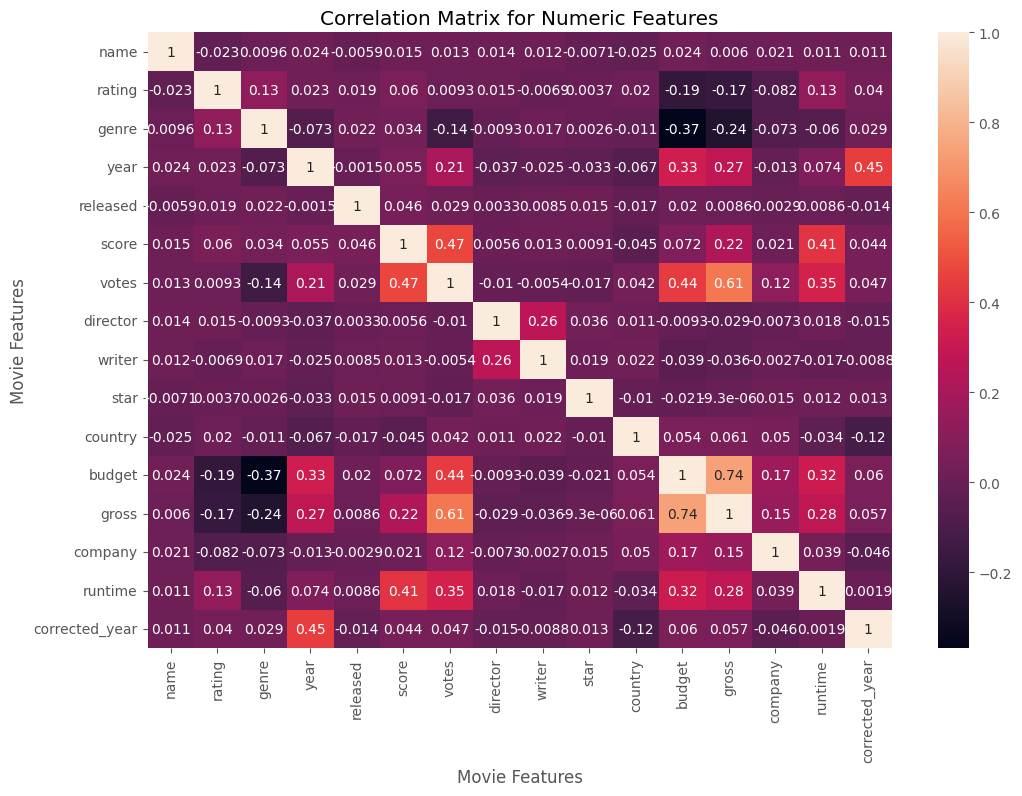

In [38]:
correlation_matrix = df_numerized.corr(method = 'pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [39]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name            name              1.000000
                rating           -0.023013
                genre             0.009617
                year              0.024435
                released         -0.005896
                score             0.014955
                votes             0.012915
                director          0.013699
                writer            0.011602
                star             -0.007109
                country          -0.024555
                budget            0.023698
                gross             0.005966
                company           0.021209
                runtime           0.010800
                corrected_year    0.011356
rating          name             -0.023013
                rating            1.000000
                genre             0.128102
                year              0.022668
                released          0.018836
                score             0.059550
                votes             0.009255
           

In [40]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget          genre            -0.368900
genre           budget           -0.368900
                gross            -0.244380
gross           genre            -0.244380
budget          rating           -0.186892
rating          budget           -0.186892
                gross            -0.168814
gross           rating           -0.168814
genre           votes            -0.136457
votes           genre            -0.136457
country         corrected_year   -0.116980
corrected_year  country          -0.116980
company         rating           -0.082189
rating          company          -0.082189
company         genre            -0.073293
genre           company          -0.073293
                year             -0.073026
year            genre            -0.073026
                country          -0.066662
country         year             -0.066662
runtime         genre            -0.060186
genre           runtime          -0.060186
company         corrected_year   -0.046169
corrected_y

In [41]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross           votes             0.614904
votes           gross             0.614904
gross           budget            0.740395
budget          gross             0.740395
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

In [42]:
# Conclusions
# Votes and Budget have highest correlation to gross earnings.
# While the company which produced the movie does not have a high correlation as anticipated (by me).